# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

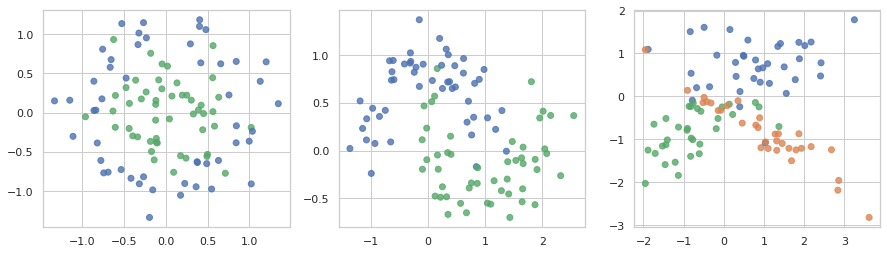

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

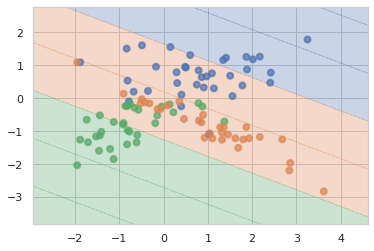

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

# Построим плоскости для каждого из трёх датасетов

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score
X_0, y_0 = datasets[0]
X_1, y_1 = datasets[1]
X_2, y_2 = datasets[2]
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.33, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier()


In [8]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None,     
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

**Первый датасет**

accuracy на тесте: 0.7272727272727273
accuracy на трейне: 1.0


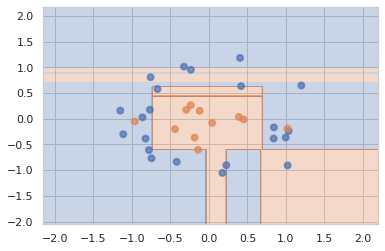

In [9]:
clf.fit(X_train_0, y_train_0)
plot_surface(clf, X_test_0, y_test_0)
print('accuracy на тесте:', accuracy_score(y_test_0, clf.predict(X_test_0)))
print('accuracy на трейне:', accuracy_score(y_train_0, clf.predict(X_train_0)))

**Второй датасет**

accuracy: 0.8787878787878788
accuracy на трейне: 1.0


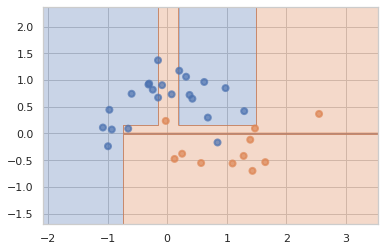

In [10]:
clf.fit(X_train_1, y_train_1)
plot_surface(clf, X_test_1, y_test_1)
print('accuracy:', accuracy_score(y_test_1, clf.predict(X_test_1)))
print('accuracy на трейне:', accuracy_score(y_train_1, clf.predict(X_train_1)))

accuracy: 0.7878787878787878
accuracy на трейне: 1.0


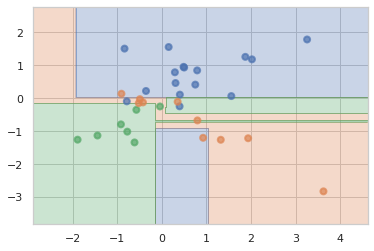

In [11]:
clf.fit(X_train_2, y_train_2)
plot_surface(clf, X_test_2, y_test_2)
print('accuracy:', accuracy_score(y_test_2, clf.predict(X_test_2)))
print('accuracy на трейне:', accuracy_score(y_train_2, clf.predict(X_train_2)))

__Ответ:__ Деревья переобучились не очень сильно - accuracy на тесте вполне себе адекватный, хотя на трейне он и везде единичка - думаю, можно получить лучшую точность если нормально откалибровать параметры




__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Accuracy: 0.7


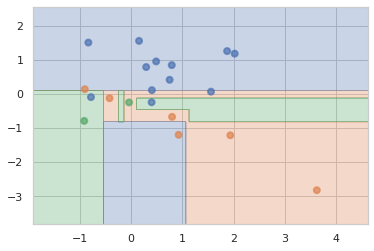

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('Accuracy:', accuracy_score(y_test, clf.predict(X_test)))
plot_surface(clf, X_test, y_test)

**Поэксперементируем с количеством листьев**

In [14]:
leaves = np.array(range(100))
Accuracy_list = []
optimal_depth = 0
for i in range(len(leaves)-1):
  clf = tree.DecisionTreeClassifier(max_depth = leaves[i+1])
  clf.fit(X_train, y_train)
  Accuracy_list.append(accuracy_score(y_validate, clf.predict(X_validate)))
  if Accuracy_list[i] == max(Accuracy_list):
    optimal_depth = leaves[i+1]
  i += 1


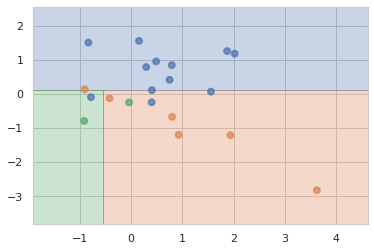

In [15]:
clf = tree.DecisionTreeClassifier(max_depth= optimal_depth)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))
plot_surface(clf, X_test, y_test)

Accuracy приросло

**Теперь с минимальной долей элементов в листе**

In [16]:
samp = np.array(range(100))
Accuracy_list = []
optimal_samp = 0
for i in range(len(samp)-1):
  clf = tree.DecisionTreeClassifier(min_samples_leaf = samp[i+1], max_depth= optimal_depth)
  clf.fit(X_train, y_train)
  Accuracy_list.append(accuracy_score(y_validate, clf.predict(X_validate)))
  if Accuracy_list[i] == max(Accuracy_list):
    optimal_samp = samp[i+1]
  i += 1

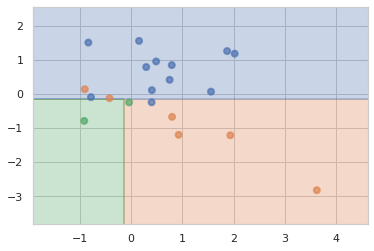

In [17]:
clf = tree.DecisionTreeClassifier(max_depth= optimal_depth, min_samples_leaf = optimal_samp)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))
plot_surface(clf, X_test, y_test)

**Accuracy ещё приросло**

**Теперь с максимальной долей конечных листов**

In [18]:
samp = np.array(range(100))
Accuracy_list = []
max_optimal_samp = 0
for i in range(len(samp)-2):
  clf = tree.DecisionTreeClassifier(min_samples_leaf = optimal_samp, max_depth= optimal_depth, max_leaf_nodes = samp[i+2] )
  clf.fit(X_train, y_train)
  Accuracy_list.append(accuracy_score(y_validate, clf.predict(X_validate)))
  if Accuracy_list[i] == max(Accuracy_list):
    max_optimal_samp = samp[i+2]
  i += 1

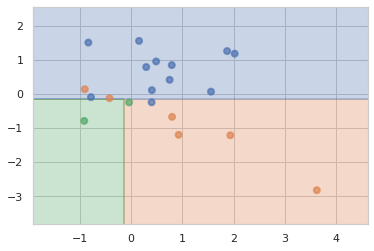

In [19]:
clf = tree.DecisionTreeClassifier(max_depth= optimal_depth, min_samples_leaf = optimal_samp, max_leaf_nodes = max_optimal_samp)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))
plot_surface(clf, X_test, y_test)

**Как мы видим параметр прироста в качестве не дал**

**Ну и посмотрим на разницу между Джини и Энтропией**

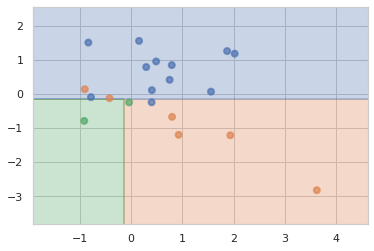

In [20]:
clf = tree.DecisionTreeClassifier(max_depth= optimal_depth, min_samples_leaf = optimal_samp, max_leaf_nodes = max_optimal_samp, criterion= 'entropy')
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))
plot_surface(clf, X_test, y_test)

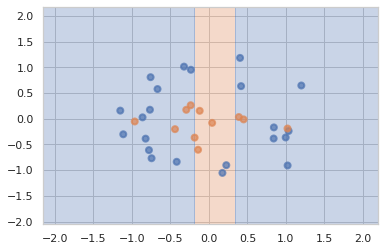

In [21]:
clf.fit(X_train_0, y_train_0)
plot_surface(clf, X_test_0, y_test_0)

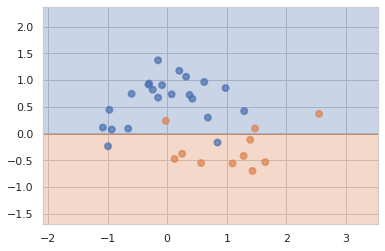

In [22]:
clf.fit(X_train_1, y_train_1)
plot_surface(clf, X_test_1, y_test_1)

**Результат в зависимости от критерия так же не изменился**

__Ответ:__ как мы видим наши разделяющие плоскости становятся более "выпуклыми" - если так вообще можно сказать про фигуры с прямыми гранями, исчезают рандомные полосы из-за переобучения - это наблюдается для всех наборов данных (см. последний пункт) - таким образом борьба с переобучением имеет схожий эффект для всех разделяющих областей 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [23]:
from hw5code_Artyom import find_best_split

In [24]:
X_train_0 = pd.DataFrame(X_train_0)
X_train_0[0]

0     0.293232
1    -0.396992
2     0.377382
3     0.489031
4    -0.085811
        ...   
62    0.633118
63    0.547174
64    0.329050
65   -0.103219
66    1.129874
Name: 0, Length: 67, dtype: float64

In [25]:
print(find_best_split(X_train_0[0].to_numpy(), y_train_0))

(array([-1.09842852, -0.85041795, -0.76521792, -0.6741713 , -0.64509895,
       -0.63028305, -0.61641522, -0.60533521, -0.5703774 , -0.53235526,
       -0.50276759, -0.47676404, -0.45685427, -0.41721893, -0.37959173,
       -0.35066527, -0.3365296 , -0.32600864, -0.29321511, -0.26808871,
       -0.23201196, -0.18907295, -0.17714543, -0.16478683, -0.14009217,
       -0.12261184, -0.11849251, -0.11432188, -0.10858349, -0.09451518,
       -0.06703041, -0.04703759, -0.01337924,  0.04579605,  0.08271   ,
        0.11298216,  0.15464076,  0.18652461,  0.21880362,  0.24523492,
        0.27146577,  0.29865503,  0.31656397,  0.34540766,  0.36773788,
        0.37554618,  0.38997917,  0.41247165,  0.43158377,  0.45976456,
        0.48388019,  0.49026913,  0.49496236,  0.52279617,  0.5536356 ,
        0.56163747,  0.56408979,  0.57350611,  0.60588039,  0.63143396,
        0.64480478,  0.68410527,  0.73359026,  0.79890451,  0.98611052,
        1.23818315]), [-0.47625508819538653, -0.465671641791044

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [26]:
df = pd.read_csv('students.csv')
y = df[' UNS']
data = df.drop(columns = [' UNS'])
data

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24
...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58
254,0.78,0.61,0.71,0.19,0.60
255,0.54,0.82,0.71,0.29,0.77
256,0.50,0.75,0.81,0.61,0.26


**Не совсем понимаю, что здесь можно увидеть, но... пусть будет так**

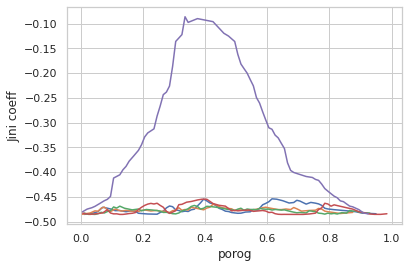

In [27]:
cols = data.columns
plt.xlabel("porog")
plt.ylabel("Jini coeff")
for i in range(len(cols)):
  thresholds, ginis, threshold_best, gini_best = (find_best_split(data[cols[i]].to_numpy(), y.to_numpy()))
  plt.plot(thresholds, ginis)
  i += 1
plt.show()

**В задании достаточно размытая формулировка - делать все на одном графике бессмысленно, ибо точки перекрывают друг друга, с другой стороны не дано третьего аргумента (чтобы сделать двумерный график с колоризацией по классу), думаю - это наиболее адекватное решение, исходя из формулировки задания**

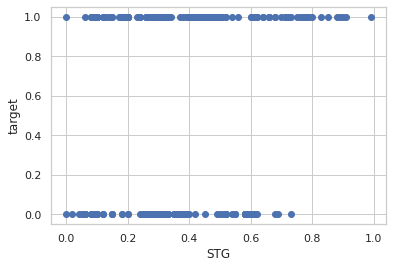

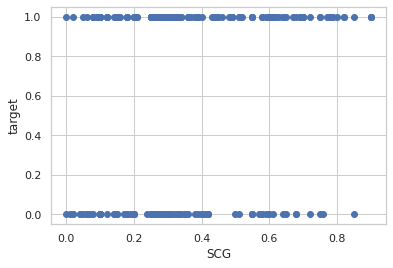

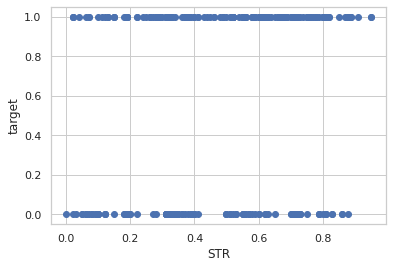

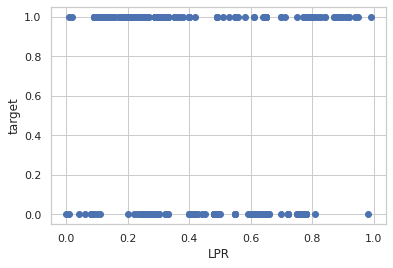

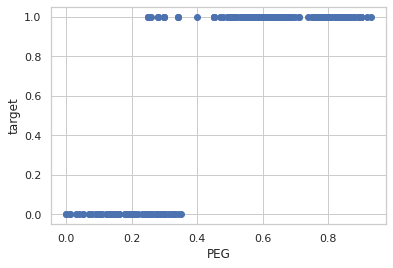

In [28]:
for feature in cols:
  plt.xlabel(feature)
  plt.ylabel('target')
  plt.scatter(x = data[feature], y = y)
  plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

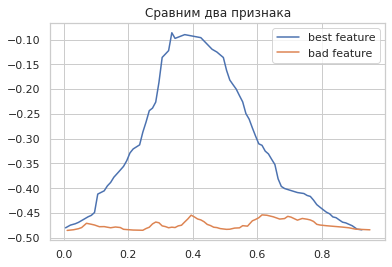

In [29]:
thresholds, ginis, threshold_best, gini_best = find_best_split(data[cols[4]].to_numpy(), y.to_numpy())
plt.plot(thresholds, ginis, label = 'best feature')
thresholds, ginis, threshold_best, gini_best = find_best_split(data[cols[0]].to_numpy(), y.to_numpy())
plt.title('Сравним два признака')
plt.plot(thresholds, ginis, label = 'bad feature')
plt.legend()
plt.show()



**Ответ:** 

1) Посмотрим на график выше - площадь под кривой для лучшего признака сильно больше, чем для достаточно посредственного

2) Посмотрим на последний график из скаттеров - выборка делится почти что однозначно, очевидно, этот критерий действительно оптимальный для разделения выборки.

3)Как я уже сказал, площадь под кривой должна быть больше - если кривая будет отсекать максимальный участок под ней, коэф Джини будет оптимальный, а выборка оптимально-разделимая.

4) Флуктуация около среднего значения - коэф. джини держится около -0.5, то есть нет оптимального способа поделить выборку ( см. график выше для сопоставления)

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**CHECK HW5CODE.py**

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [30]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

df = pd.read_fwf('agaricus-lepiota.data', delimiter = ",", header=None)
lab_enc = preprocessing.LabelEncoder()
df = df.apply(lab_enc.fit_transform)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [31]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[1:]], df[0], test_size=0.5, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [32]:
from hw5code_Artyom import find_best_split
from hw5code_Artyom import DecisionTree

In [33]:
x_train

array([[2, 0, 4, ..., 3, 4, 0],
       [5, 3, 5, ..., 7, 1, 6],
       [5, 0, 3, ..., 2, 5, 0],
       ...,
       [2, 3, 4, ..., 3, 5, 4],
       [3, 2, 2, ..., 7, 4, 4],
       [3, 0, 3, ..., 7, 2, 1]])

In [34]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [35]:
feature_types = ['categorical']*len(df.columns[1:])

tree = DecisionTree(feature_types = feature_types)
tree.fit(x_train,  y_train)

In [36]:
preds = tree.predict(x_train)
preds

array([0, 0, 0, ..., 0, 1, 0])

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_train, preds)

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [39]:
df = [pd.read_csv(url) for url in ['https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                                   'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
                                   'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
                                   'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
                                  ]]
df[3]['recommend'] = df[3]['recommend'].replace({'not_recom' : 0 ,'recommend' : 0, 'very_recom' : 1 , 'priority' : 1 , 'spec_prior' : 1}) 
df[2]['unacc'] = df[2]['unacc'].replace({'unacc' : 0 ,'acc' : 0, 'good' : 1 , 'vgood' : 1}) 

In [40]:
mushrooms = df[0]
tic_tac = df[1]
car = df[2]
nursery = df[3]

In [41]:
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1


In [42]:
from sklearn.model_selection import cross_val_score

**Сначала сделаем для всех признаков как категориальных (Я дописал в классе метод get_params)**

In [43]:
for i in range(len(df)):
  lab_enc = preprocessing.LabelEncoder()
  df[i] = df[i].apply(lab_enc.fit_transform)


In [44]:
y_0 = df[0].iloc[:,0].values
y_1 = df[1].iloc[:,-1].values
y_2 = df[2].iloc[:,-1].values
y_3 = df[3].iloc[:,-1].values

X_0 = df[0].iloc[:,:-1].to_numpy()
X_1 = df[1].iloc[:,:-1].to_numpy()
X_2 = df[2].iloc[:,:-1].to_numpy()
X_3 = df[3].iloc[:,:-1].to_numpy()

In [45]:
import hw5code_Artyom
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [46]:
tree = DecisionTree(feature_types = feature_types)
tree.fit(X_0,  y_0)

In [47]:
print('результаты 1 датасета для категориальных:', cross_val_score(tree, X_0, y_0, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 1 датасета для категориальных: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
tree = DecisionTree(feature_types = feature_types)
tree.fit(X_1,  y_1)

In [50]:
print('результаты 2 датасета для категориальных:', cross_val_score(tree, X_1, y_1, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 2 датасета для категориальных: [0.52083333 0.5625     0.97916667 0.23958333 0.44791667 0.85416667
 0.57291667 0.49473684 0.58947368 0.21052632]


In [51]:
tree = DecisionTree(feature_types = feature_types)
tree.fit(X_2,  y_2)

In [53]:
print('результаты 3 датасета для категориальных:', cross_val_score(tree, X_2, y_2, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 3 датасета для категориальных: [1.         1.         1.         1.         1.         1.
 0.86705202 0.95348837 0.90116279 0.95348837]


In [54]:
tree = DecisionTree(feature_types = feature_types)
tree.fit(X_3,  y_3)

In [55]:
print('результаты 4 датасета для категориальных:', cross_val_score(tree, X_3, y_3, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 4 датасета для категориальных: [0.9992284 1.        1.        1.        1.        1.        1.
 1.        1.        1.       ]


**Теперь для решения из Sklearn**

In [56]:
tree = DecisionTreeClassifier()
tree.fit(X_0,  y_0)
print('результаты 1 датасета для готовой реализации:', cross_val_score(tree, X_0, y_0, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 1 датасета для готовой реализации: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
tree = DecisionTreeClassifier()
tree.fit(X_1,  y_1)
print('результаты 2 датасета для готовой реализации:', cross_val_score(tree, X_1, y_1, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 2 датасета для готовой реализации: [0.72916667 0.71875    0.52083333 0.90625    0.78125    0.71875
 0.82291667 0.81052632 0.92631579 0.88421053]


In [58]:
tree = DecisionTreeClassifier()
tree.fit(X_2,  y_2)
print('результаты 3 датасета для готовой реализации:', cross_val_score(tree, X_2, y_2, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 3 датасета для готовой реализации: [0.92485549 0.95953757 0.92485549 0.99421965 0.97109827 0.98843931
 0.91907514 0.87790698 0.93023256 0.95348837]


In [59]:
tree = DecisionTreeClassifier()
tree.fit(X_3,  y_3)
print('результаты 4 датасета для готовой реализации:', cross_val_score(tree, X_3, y_3, cv=10,  scoring=make_scorer(accuracy_score)))

результаты 4 датасета для готовой реализации: [0.9992284 1.        0.9992284 1.        1.        1.        1.
 1.        1.        1.       ]


**В общем тут уже поджимает дедлайн, так что хотя бы 2 проверим**

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

1) Решение из Sklearn, как мне показалось, имеет преимущество над моим деревом, однако оно не столь существенно, чтобы сказать, что мое дерево намного хуже готовой реализации. В целом для всех наборов данных результаты для этих двух были достаточон схожи. Что касается тех, что я не успел дописать - у численных (скорее всего) получится каша-мала, потому что лэйбл энкодер нельзя использовать для таких задач, ординал энкодер всех признаков можно использовать как для категориальных, так и для численных, думаю, он показал бы неплохой результат.

2) Сложно "обобщить" случайность на все 4 датасета - возможно, что-то связанное с ошибками механического ввода данных или пропуски в них (вряд ли это происходит случайно). Думаю, чтобы алгоритмы работали лучше стоит по квантилям удалить "выбросы", ломающие модель, посмотреть на значимость признаков и те, по которым деление вообще не происходило, преобразовать или вовсе отсеять, можно ещё взглянуть на heatmap, одним словом - избавиться от лишних фичей и выбросов, создать новые фичи, некоррелированные со старыми (если у нас есть такая опция)



**Когда в день дедлайна ДЗ написал две контрольные, поработал полный день, поел и даже успел сказать маме, что всё хорошо:**




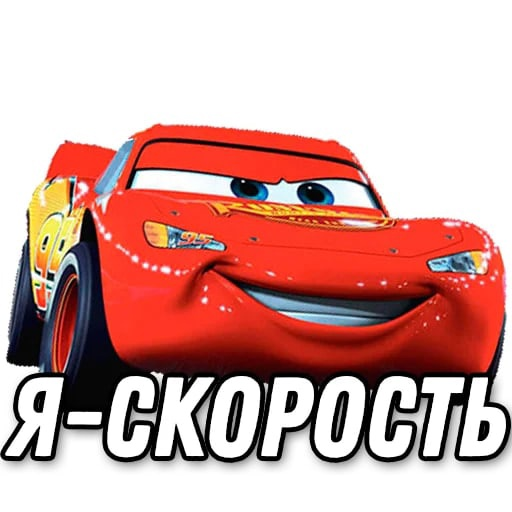
